<a href="https://colab.research.google.com/github/MatthaeusSurafial/Mathi/blob/main/XGBoost_1_Fertig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

true = pd.read_csv('/content/true.csv.zip')
fake = pd.read_csv('/content/fake.csv.zip')

true['target'] = 0
fake['target'] = 1

news = pd.concat([true, fake], axis=0, ignore_index=True)
news = news.sample(frac=1).reset_index(drop=True)

X = news['text']
y = news['target']

In [ ]:
#Hier werden die Daten so bearbeitet wie bei Kaggle, erneut für den enstrpechenden Vergleich, jedoch gibt es einen unterschied, hier habe ich das entsprechende Label "Target" genannt. Indem aufgezeigt wird was falsch ist und was wahr

In [ ]:
# Daten Zerteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Weiter Zerteilen
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
#Die Selbe zuteilung 70:20:10

In [ ]:
# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
#Der bereitgestellte Code führt die Vektorisierung des Textes mithilfe der TF-IDF-Methode durch. Zuerst wird ein TF-IDF-Vektorisierer mit einem maximalen Dokumentenfrequenzwert von 0.1 initialisiert.
#Dann werden die Trainingsdaten X_train mit diesem Vektorisierer transformiert. Das wir sicherstellen das TF-IDF-Matrizen erstellet werden. Gleiches wird für die Testdaten- und Validierungsdaten durchgeführt.

In [ ]:
#Denn Klassifizierer modifizeren und trenieren um Overfitting zu verhindern
xgb_classifier = xgb.XGBClassifier(
max_depth=5, # Limiting tree depth
reg_alpha=0.1,
reg_lambda=0.1
)
xgb_classifier.fit(tfidf_train, y_train, eval_set=[(tfidf_val, y_val)], eval_metric='error', early_stopping_rounds=10, verbose=True)
# Vorhersage
y_pred = xgb_classifier.predict(tfidf_test)
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.25570
[1]	validation_0-error:0.25549
[2]	validation_0-error:0.20755
[3]	validation_0-error:0.19589
[4]	validation_0-error:0.19376
[5]	validation_0-error:0.17011
[6]	validation_0-error:0.15463
[7]	validation_0-error:0.14158
[8]	validation_0-error:0.13968
[9]	validation_0-error:0.13140
[10]	validation_0-error:0.12854
[11]	validation_0-error:0.11995
[12]	validation_0-error:0.11740
[13]	validation_0-error:0.11401
[14]	validation_0-error:0.11072
[15]	validation_0-error:0.11051
[16]	validation_0-error:0.10775
[17]	validation_0-error:0.10743
[18]	validation_0-error:0.10266
[19]	validation_0-error:0.10150
[20]	validation_0-error:0.09853
[21]	validation_0-error:0.09715
[22]	validation_0-error:0.09513
[23]	validation_0-error:0.09397
[24]	validation_0-error:0.09174
[25]	validation_0-error:0.08972
[26]	validation_0-error:0.08792
[27]	validation_0-error:0.08813
[28]	validation_0-error:0.08792
[29]	validation_0-error:0.08601
[30]	validation_0-error:0.08431
[31]	validation_0-

In [ ]:
#Die bereitgestellten Zeilen zeigen die Validierungsfehler für jede Epoche während des Trainings eines XGBoost-Modells. Der Fehler wird als Anteil falsch klassifizierter Instanzen angegeben.
#Die Werte zeigen eine Verbesserung des Validierungsfehlers im Laufe der Epochen, was darauf hindeutet, dass das Modell während des Trainings besser wird. Was ein indiz dafür ist dass das Modell, funktioniert

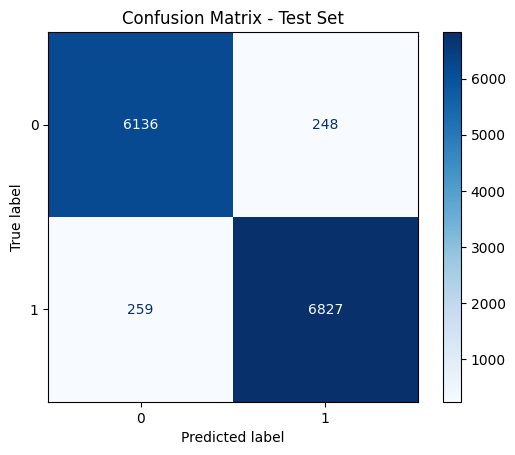

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
# visualisation the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()


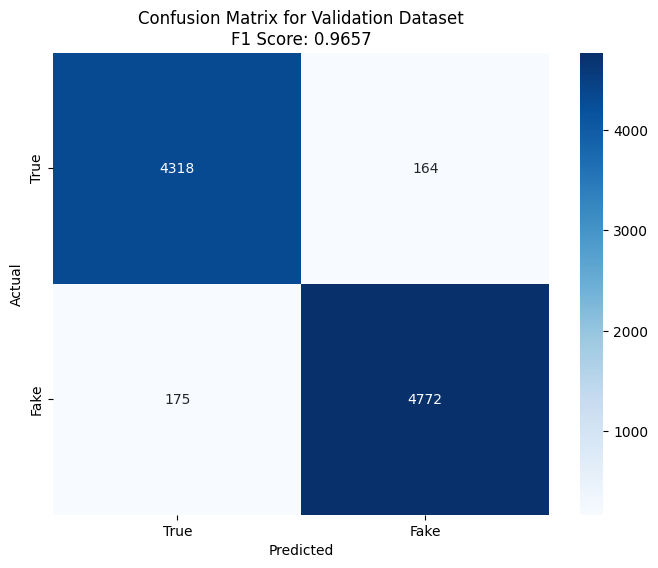

F1 Score for Validation Dataset: 0.9656986744915511


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Vorhersage on validation dataset
y_pred_val = xgb_classifier.predict(tfidf_val)

# Erhalten der Confusion matrix für Validierunsdatensatz
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

#  F1 score
tn, fp, fn, tp = conf_matrix_val.ravel()
f1_score = tp / (tp + 0.5 * (fn + fp))

# Visualisiserung Confusion matrix für Validierungsdatensatz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues",
            xticklabels=["True", "Fake"],
            yticklabels=["True", "Fake"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Validation Dataset\nF1 Score: {:.4f}'.format(f1_score))
plt.show()

print("F1 Score for Validation Dataset:", f1_score)

In [ ]:
from sklearn.metrics import classification_report
# Generiere Klassifikationsbericht für das Validierungsdatenset
class_report_val = classification_report(y_val, y_pred_val, target_names=["True", "Fake"])
# Zeige den Klassifikationsbericht
print("Klassifikationsbericht für das Validierungsdatenset:")
print(class_report_val)

Klassifikationsbericht für das Validierungsdatenset:
              precision    recall  f1-score   support

        True       0.96      0.96      0.96      4482
        Fake       0.97      0.96      0.97      4947

    accuracy                           0.96      9429
   macro avg       0.96      0.96      0.96      9429
weighted avg       0.96      0.96      0.96      9429



In [ ]:
#Auch hier werden dann die entsprechenden Metriken berechnet und wiedergegeben mithilfe einer Confusion Matrix und einem Klassifizerungsbericht